In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1. Загрузка и анализ данных
import os
os.chdir('/home/konnilol/Documents/uni/mmo/pr6')
data = pd.read_csv('isolation.csv')
X = data[['x', 'y']]
true_labels = data['color']


In [3]:
print("Dataset shape:", data.shape)
print("\nDataset info:")
print(data.describe())
print("\nClass distribution:")
print(data['color'].value_counts().sort_index())


Dataset shape: (464, 3)

Dataset info:
                x           y       color
count  464.000000  464.000000  464.000000
mean   225.335505  195.701491    1.193966
std     90.069062   50.353061    0.680717
min      9.752135   26.512898    0.000000
25%    155.312349  172.938107    1.000000
50%    220.605854  190.925390    1.000000
75%    280.448223  229.517999    2.000000
max    479.003025  369.283297    2.000000

Class distribution:
color
0     71
1    232
2    161
Name: count, dtype: int64


In [4]:
# 2. Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# 3. Определение оптимального k (2-10)
inertias = []
silhouettes = []
ch_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))


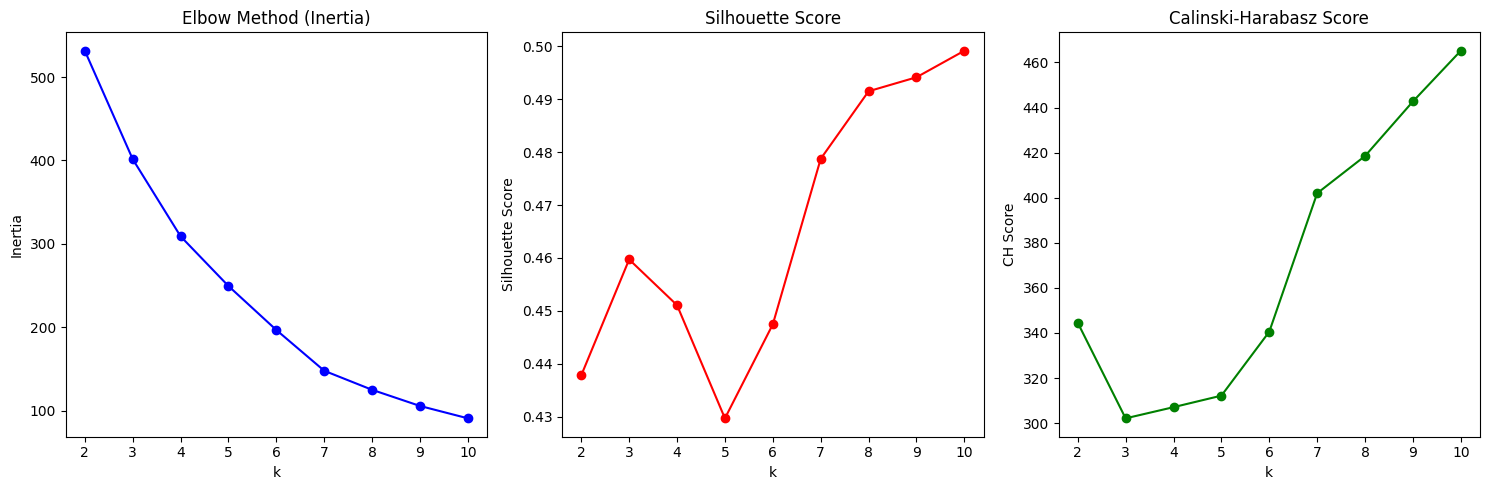

In [6]:
# 4. Визуализация метрик
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(k_range, inertias, 'bo-')
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')

axes[1].plot(k_range, silhouettes, 'ro-')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')

axes[2].plot(k_range, ch_scores, 'go-')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].set_xlabel('k')
axes[2].set_ylabel('CH Score')

plt.tight_layout()
plt.savefig('clustering_metrics.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
# 5. KMeans с k=3
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
pred_labels = kmeans.fit_predict(X_scaled)


In [8]:
# Метрики качества
sil_score = silhouette_score(X_scaled, pred_labels)
ch_score = calinski_harabasz_score(X_scaled, pred_labels)
ari = adjusted_rand_score(true_labels, pred_labels)

print(f"\nK={k_opt} results:")
print(f"Silhouette: {sil_score:.4f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"ARI: {ari:.4f}")



K=3 results:
Silhouette: 0.4597
Calinski-Harabasz: 302.14
ARI: 0.4895


In [9]:
# 6. Центры кластеров (исходная шкала)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=['x_center', 'y_center'])
centers_df.index.name = 'cluster'
print("\nCluster centers:")
print(centers_df.round(4))



Cluster centers:
         x_center  y_center
cluster                    
0        301.6605  231.5867
1        169.3148  184.9169
2        204.8849   78.5397


In [10]:
# 7. Таблица сопряженности
contingency = pd.crosstab(pred_labels, true_labels)
print("\nContingency table:")
print(contingency)



Contingency table:
color   0    1    2
row_0              
0      22   29  136
1      14  203   25
2      35    0    0


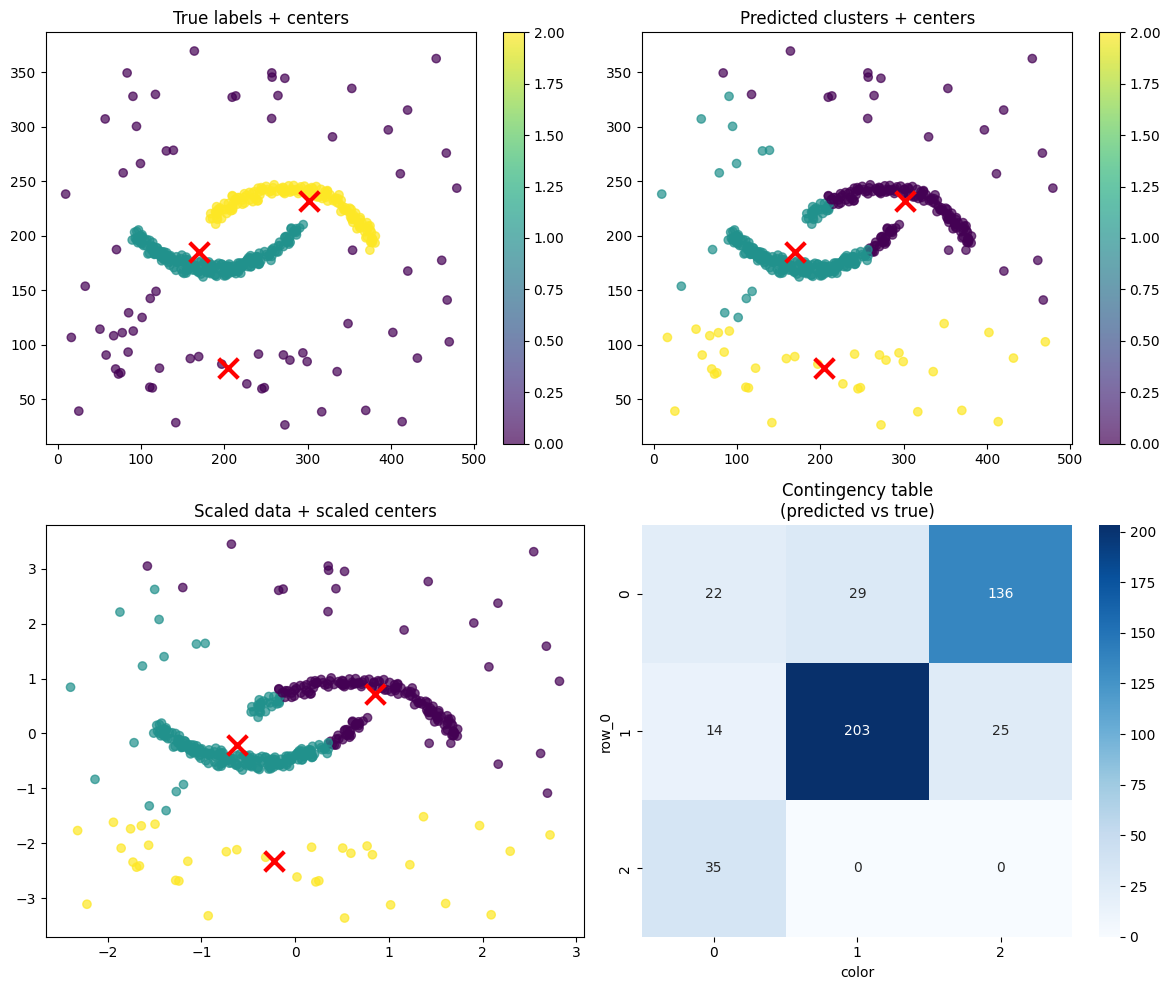

In [11]:
# 8. Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Исходные данные с истинными метками
scatter1 = axes[0,0].scatter(data['x'], data['y'], c=true_labels, cmap='viridis', alpha=0.7)
axes[0,0].scatter(centers[:,0], centers[:,1], c='red', marker='x', s=200, linewidth=3)
axes[0,0].set_title('True labels + centers')
plt.colorbar(scatter1, ax=axes[0,0])

# Предсказанные кластеры
scatter2 = axes[0,1].scatter(data['x'], data['y'], c=pred_labels, cmap='viridis', alpha=0.7)
axes[0,1].scatter(centers[:,0], centers[:,1], c='red', marker='x', s=200, linewidth=3)
axes[0,1].set_title('Predicted clusters + centers')
plt.colorbar(scatter2, ax=axes[0,1])

# Нормализованные данные
axes[1,0].scatter(X_scaled[:,0], X_scaled[:,1], c=pred_labels, cmap='viridis', alpha=0.7)
axes[1,0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                 c='red', marker='x', s=200, linewidth=3)
axes[1,0].set_title('Scaled data + scaled centers')

# Контингентная таблица
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Contingency table\n(predicted vs true)')

plt.tight_layout()
plt.savefig('clustering_results.png', dpi=300, bbox_inches='tight')
plt.show()


##### 2 основных кластера довольно хорошо предсказались. третий (видимо какие-то выбросы из исходного датасета) довольно плохо предсказался (возможно из-за того что эти записи разбросаны везде и мой алгоритм просто плохо для такого подходит)